In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import requests
style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,10)

import yfinance as yf

In [2]:
a1 = yf.Ticker("AAPL")
df = a1.history(start="2013-01-01",end="2018-12-31" ,interval = '1d')
smas = df.rolling(window=53).mean()
smal = df.rolling(window=105).mean()
df['longer SMA']= smal['Close']
df['shorter SMA']= smas['Close']
df['Diff']=df['shorter SMA']-df['longer SMA']
df['Entry_price']=0
df['Exit_price']=0
df['Profit']=0
a=0
x=0
k=0
total_investment=0
total_profit=0

for x in range(len(df)):

    if(x!=0 and k==0):
        
        
        if(df['Diff'].iloc[x]>0 and df['Diff'].iloc[x-1]<0 ):
            df['Entry_price'].iloc[x]=df['Close'].iloc[x]
            total_investment=total_investment+df['Entry_price'].iloc[x]
            a=df['Close'].iloc[x]
            k=k+1
        
    

        else:
            df['Exit_price'].iloc[x]=df['Exit_price'].iloc[x-1]
            df['Entry_price'].iloc[x]=df['Entry_price'].iloc[x-1]
            df['Profit'][x]=df['Profit'][x-1]
    
    elif(x!=0 and k!=0):
       

        if(df['Diff'].iloc[x]>0 and df['Diff'].iloc[x-1]<0   ):
            df['Entry_price'].iloc[x]=df['Close'].iloc[x]
            total_investment=total_investment+df['Entry_price'].iloc[x]
            a=df['Close'].iloc[x]
            k=k+1
            
        
        elif(df['Diff'].iloc[x]<0 and df['Diff'].iloc[x-1]>0 ) :
            df['Exit_price'].iloc[x]=df['Close'].iloc[x]
            df['Profit'].iloc[x]=df['Close'].iloc[x]-a
            total_profit=total_profit+df['Profit'].iloc[x]
            a=0
            k=k+1
        
        
    

        else:
            df['Exit_price'].iloc[x]=df['Exit_price'].iloc[x-1]
            df['Entry_price'].iloc[x]=df['Entry_price'].iloc[x-1]
            df['Profit'][x]=df['Profit'][x-1]


    


   

/Users/macbookair/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-2-05285a5ac9c9>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Profit'][x]=df['Profit'][x-1]
<ipython-input-2-05285a5ac9c9>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Profit'][x]=df['Profit'][x-1]


In [3]:
total_investment

160.153977394104

In [4]:
total_profit

23.98704433441162

In [5]:
total_profit*100/total_investment

14.977488991974727

In [6]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,longer SMA,shorter SMA,Diff,Entry_price,Exit_price,Profit
Date,,,,,,,,,,,,,
2012-12-31,15.794363,16.563772,15.747030,16.463844,659492400,0.0,0.0,NaN,NaN,NaN,0.0,0.000000,0.000000
2013-01-02,17.133637,17.170142,16.756513,16.985447,560518000,0.0,0.0,NaN,NaN,NaN,0.0,0.000000,0.000000
2013-01-03,16.949870,17.005248,16.737022,16.771053,352965200,0.0,0.0,NaN,NaN,NaN,0.0,0.000000,0.000000
2013-01-04,16.612344,16.663700,16.267703,16.303900,594333600,0.0,0.0,NaN,NaN,NaN,0.0,0.000000,0.000000
2013-01-07,16.149217,16.375058,15.938844,16.207998,484156400,0.0,0.0,NaN,NaN,NaN,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,38.124593,38.440557,36.367353,36.634705,382978400,0.0,0.0,49.684107,47.161151,-2.522956,0.0,42.465446,2.736813
2018-12-24,36.007635,36.834003,35.628480,35.686813,148676800,0.0,0.0,49.576161,46.811886,-2.764275,0.0,42.465446,2.736813
2018-12-26,36.044100,38.214522,35.660083,38.199940,234330000,0.0,0.0,49.493551,46.495871,-2.997680,0.0,42.465446,2.736813


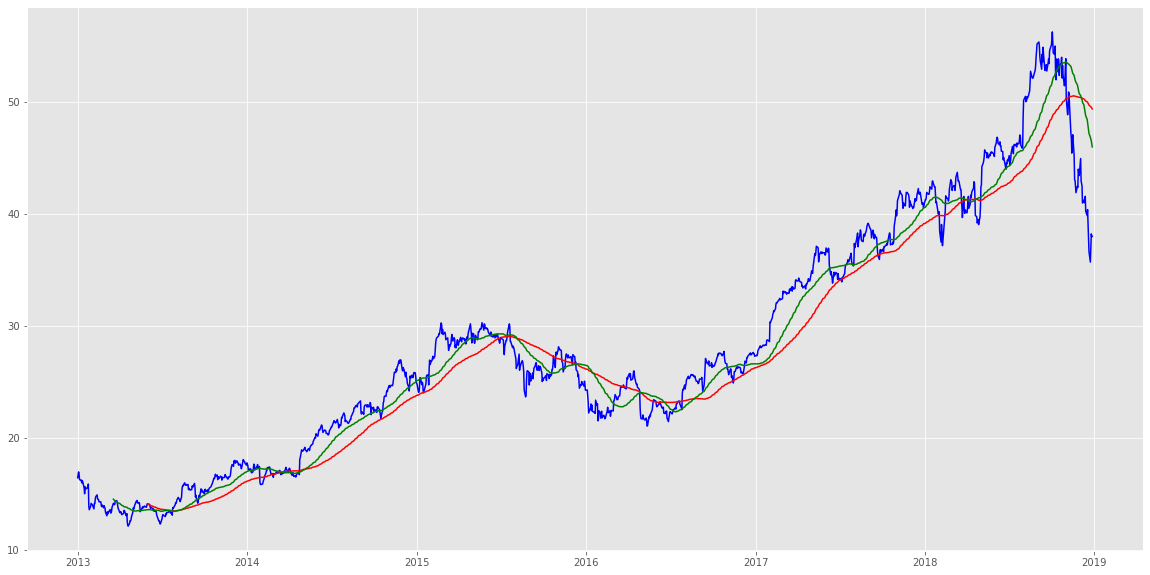

In [7]:
plt.plot(df['Close'],color='blue')
plt.plot(df['longer SMA'],color='red')
plt.plot(df['shorter SMA'],color='green')

In [8]:
a1 = yf.Ticker("RELIANCE.NS")
df = a1.history(start="2013-01-01",end="2018-12-31" ,interval = '1d')
smas = df.rolling(window=53).mean()
smal = df.rolling(window=105).mean()
df['longer SMA']= smal['Close']
df['shorter SMA']= smas['Close']
df['Diff']=df['shorter SMA']-df['longer SMA']
df['Entry_price']=0
df['Exit_price']=0
df['Profit']=0
a=0
x=0
k=0
total_investment=0
total_profit=0

for x in range(len(df)):

    if(x!=0 and k==0):
        
        
        if(df['Diff'].iloc[x]>0 and df['Diff'].iloc[x-1]<0 ):
            df['Entry_price'].iloc[x]=df['Close'].iloc[x]
            total_investment=total_investment+df['Entry_price'].iloc[x]
            a=df['Close'].iloc[x]
            k=k+1
        
    

        else:
            df['Exit_price'].iloc[x]=df['Exit_price'].iloc[x-1]
            df['Entry_price'].iloc[x]=df['Entry_price'].iloc[x-1]
            df['Profit'][x]=df['Profit'][x-1]
    
    elif(x!=0 and k!=0):
       

        if(df['Diff'].iloc[x]>0 and df['Diff'].iloc[x-1]<0   ):
            df['Entry_price'].iloc[x]=df['Close'].iloc[x]
            total_investment=total_investment+df['Entry_price'].iloc[x]
            a=df['Close'].iloc[x]
            k=k+1
            
        
        elif(df['Diff'].iloc[x]<0 and df['Diff'].iloc[x-1]>0 ) :
            df['Exit_price'].iloc[x]=df['Close'].iloc[x]
            df['Profit'].iloc[x]=df['Close'].iloc[x]-a
            total_profit=total_profit+df['Profit'].iloc[x]
            a=0
            k=k+1
        
        
    

        else:
            df['Exit_price'].iloc[x]=df['Exit_price'].iloc[x-1]
            df['Entry_price'].iloc[x]=df['Entry_price'].iloc[x-1]
            df['Profit'][x]=df['Profit'][x-1]


    


   

/Users/macbookair/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-8-875156fa7aa7>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Profit'][x]=df['Profit'][x-1]
<ipython-input-8-875156fa7aa7>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Profit'][x]=df['Profit'][x-1]


In [9]:
total_investment

3685.3265991210938

In [10]:
total_profit

633.3703918457031

In [11]:
total_profit*100/total_investment

17.186275756313005

In [12]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,longer SMA,shorter SMA,Diff,Entry_price,Exit_price,Profit
Date,,,,,,,,,,,,,
2013-01-01,390.580114,391.783340,388.312549,389.052979,3152667,0.0,0.0,NaN,NaN,NaN,0.0,0.000000,0.000000
2013-01-02,390.580102,396.133378,389.909102,392.408051,6203434,0.0,0.0,NaN,NaN,NaN,0.0,0.000000,0.000000
2013-01-03,392.708836,398.909987,390.857735,398.331512,7968629,0.0,0.0,NaN,NaN,NaN,0.0,0.000000,0.000000
2013-01-04,398.863731,400.113205,394.999573,398.840607,6140890,0.0,0.0,NaN,NaN,NaN,0.0,0.000000,0.000000
2013-01-07,400.622289,403.074961,394.189725,396.411041,7064261,0.0,0.0,NaN,NaN,NaN,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,1100.612249,1106.726733,1072.240940,1076.349854,8360445,0.0,0.0,1133.440061,1083.492513,-49.947547,0.0,1143.169189,215.618958
2018-12-24,1077.034694,1079.284874,1062.995816,1065.539429,4183821,0.0,0.0,1133.408382,1084.236405,-49.171976,0.0,1143.169189,215.618958
2018-12-26,1062.262003,1076.154163,1042.548792,1074.539917,7278403,0.0,0.0,1133.347818,1084.032430,-49.315388,0.0,1143.169189,215.618958


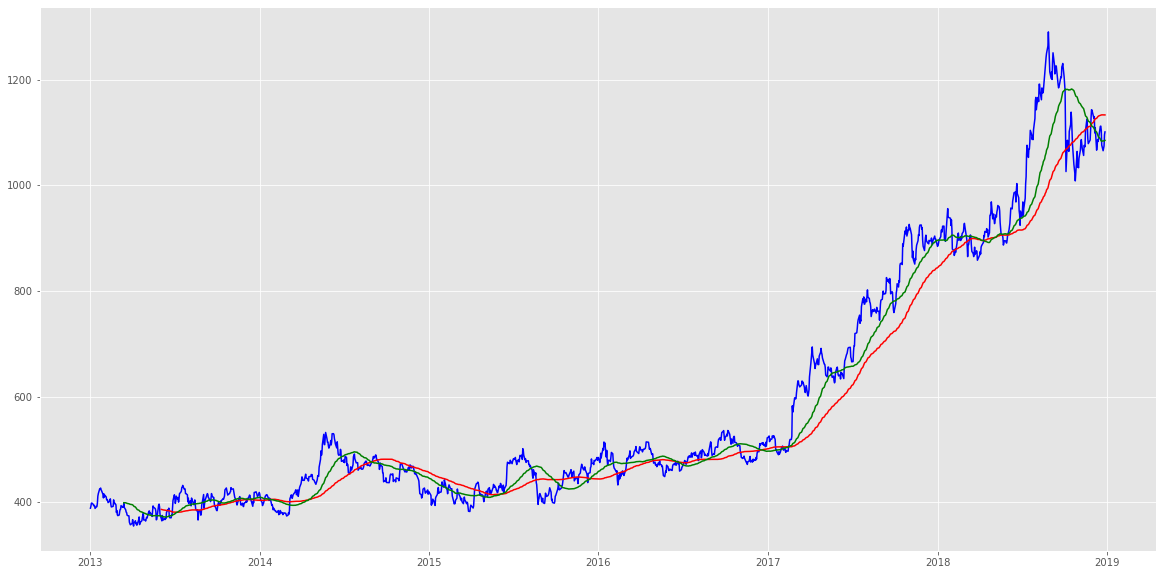

In [13]:
plt.plot(df['Close'],color='blue')
plt.plot(df['longer SMA'],color='red')
plt.plot(df['shorter SMA'],color='green')